## Supervised Binary Classification with parametric Algorithm
Modeling of Data as Supervised Learning Problem as a binary classification. The ten minutes leading up to the crash will be assigned with target = 1. Logistic Regression will be used, as I want to see calibrated Probabilites for Failure and change Thresholds. 

Approach: Same as before, but with some Feature Selection done

In [1]:
# Data Manipulation and Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('Solarize_Light2')
plt.rcParams['font.size'] = 18
from warnings import filterwarnings
filterwarnings('ignore')

# Data Preparation
from sklearn.model_selection import train_test_split
import collections
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

## Import and Check Data

In [2]:
df = pd.read_csv('transform_one.csv')

In [3]:
df.head()

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_51,broken
0,2.458999,47.157115,53.200950,46.354164,633.940975,75.863615,13.366248,16.136790,15.612343,15.049915,...,31.705729,41.601557,39.424188,65.393518,51.070605,38.194441,156.97335,67.346648,202.401625,0
1,2.453195,47.478296,53.164060,46.397568,635.393490,75.879854,13.360821,16.168255,15.761719,15.106337,...,31.484375,42.265622,38.975694,58.043980,51.128472,39.091435,181.85764,69.733797,201.215260,0
2,2.454080,48.723958,53.190103,46.319442,635.648140,78.037966,13.353586,16.177660,15.669850,15.084637,...,31.874998,40.572914,41.984954,52.777776,46.064816,39.872686,221.87500,78.240739,200.578710,0
3,2.454178,48.554686,53.120658,46.245659,636.238420,74.929848,13.341288,16.153065,15.792101,15.070170,...,32.343747,39.583330,37.586804,47.829862,47.337964,40.538193,202.40162,100.781266,216.869210,0
4,2.454867,48.949651,53.116316,46.176213,633.750000,72.600750,13.342011,16.135703,15.661170,15.085359,...,32.421872,39.062497,36.516201,46.006944,44.155093,39.178240,220.77546,83.159725,221.527780,0


## Train-Test-Split, SMOTE, Scaling

In [4]:
X = df.drop('broken', axis=1)
y = df.broken

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=y, random_state=44)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9127, 50), (6085, 50), (9127,), (6085,))

In [6]:
# normally smote needs 6 neighbors, that is why i had to define number
sm = SMOTE(k_neighbors=2, random_state = 12)
X_trains, y_trains = sm.fit_resample(X_train, y_train)

print(y_train.value_counts())
print(collections.Counter(y_trains))

0    9123
1       4
Name: broken, dtype: int64
Counter({0: 9123, 1: 9123})


In [7]:
# Scaler Object
sc = StandardScaler()

# Fitting on train
sc.fit(X_trains)

# Transformation of train and test
X_trains = sc.transform(X_trains)
X_tests = sc.transform(X_test)

In [8]:
# Ohne Oversampling
sc = StandardScaler()
sc.fit(X_train)

X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

## Feature Importance
Find most important Features with the Random Forest Classifier. Due to multicollinearity in the data set, the results must be viewed carefully.

In [9]:
clf = RandomForestClassifier(n_estimators=100)

In [10]:
clf.fit(X_trains, y_trains)

RandomForestClassifier()

In [11]:
y_pred_clf = clf.predict(X_test)

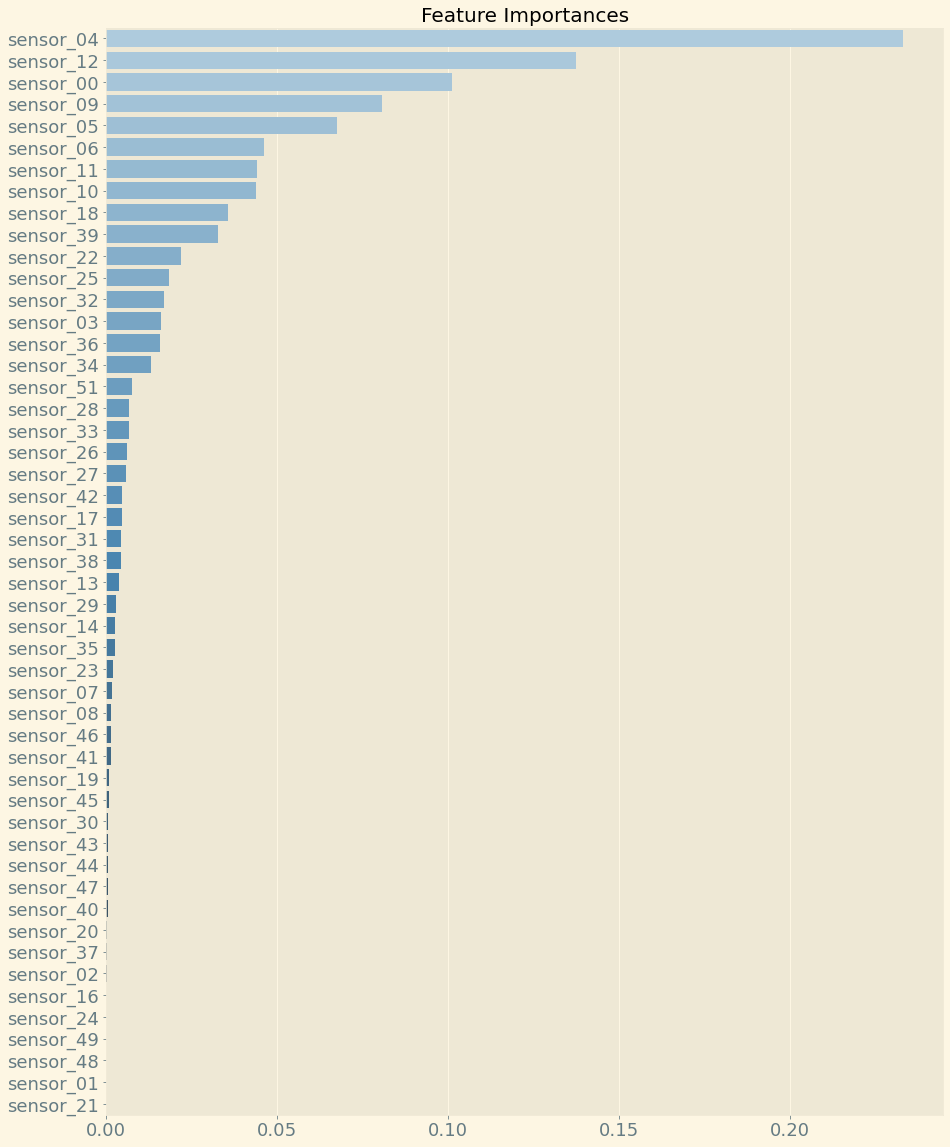

In [13]:
fi = pd.Series(data=clf.feature_importances_, index=df.columns[:-1]).sort_values(ascending=False)
plt.figure(figsize=(15,20))
plt.title("Feature Importances", fontsize = 20)
ax = sns.barplot(y=fi.index, x=fi.values, palette="Blues_d", orient='h')

In [15]:
fi.index.tolist()[:8]

['sensor_04',
 'sensor_12',
 'sensor_00',
 'sensor_09',
 'sensor_05',
 'sensor_06',
 'sensor_11',
 'sensor_10']

## Assessment of Feature Importance
The results seem to, at least partially, coincide with what the manual analysis reading the plots showed. (Sensor 0, 4, 10, 11, 12)